# Jawaban Research Questions Tim Akademi TensorFlow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, ShuffleSplit, KFold, cross_val_predict, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import math

In [ ]:
# Muat dataset training
raw_data = pd.read_csv("/content/train.csv")

In [ ]:
# Salin dataframe training ke dataframe baru
df = raw_data.copy()

In [ ]:
# Cek informasi dari data yang diberikan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6400 non-null   int64  
 1   Alkalinity, total       6400 non-null   float64
 2   Calcium                 6400 non-null   float64
 3   Chloride                6400 non-null   float64
 4   Fluoride                6400 non-null   float64
 5   Magnesium               6400 non-null   float64
 6   Nitrate as N            6400 non-null   float64
 7   Sodium                  6400 non-null   float64
 8   Specific Conductivity   6400 non-null   float64
 9   Sulfate                 6400 non-null   float64
 10  Total Dissolved Solids  6400 non-null   float64
 11  Hardness                6400 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 600.1 KB


In [ ]:
df.head()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
0,0,120.0,24.0,6.9,0.314,7.1,0.498,48.0,510.0,23.2,240.0,90.4
1,1,140.0,41.0,11.0,0.150,6.5,0.950,19.0,300.0,8.5,190.0,130.0
2,2,160.0,51.0,9.0,0.450,9.1,2.500,12.0,370.0,25.0,230.0,160.0
3,3,46.0,13.0,2.9,0.120,2.7,0.430,6.4,110.0,5.0,97.0,41.0
4,4,240.0,147.0,70.0,0.600,48.0,6.800,93.0,1410.0,418.0,950.0,586.0


In [ ]:
df.describe()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
count,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000
mean,3199.500000,167.151047,69.350432,53.213620,0.333625,23.446335,3.382707,62.437731,637.631953,71.645934,409.570669,216.148203
std,1847.665193,83.157803,1052.136452,92.934505,0.452473,325.389503,4.878279,556.891904,597.297274,108.414049,302.958442,161.431526
min,0.000000,12.000000,0.610000,0.580000,0.049000,0.051000,0.002300,1.300000,40.000000,0.140000,19.580000,2.500000
25%,1599.750000,110.000000,25.000000,11.000000,0.140000,7.300000,0.850000,21.000000,340.000000,13.000000,220.000000,101.000000
50%,3199.500000,153.500000,45.000000,28.000000,0.210000,14.000000,2.000000,35.000000,520.000000,33.000000,320.000000,180.000000
75%,4799.250000,209.000000,72.000000,62.000000,0.382250,25.000000,4.300000,60.000000,800.000000,85.000000,500.000000,281.000000
max,6399.000000,1000.000000,83000.000000,2100.000000,9.000000,26000.000000,106.000000,32000.000000,31400.000000,2000.000000,4100.000000,1901.000000


### Insight yang didapat
Semua data bersifat non-null, artinya tidak ada data yang kosong. Selain itu, semua data yang diberikan juga sudah bertipe float. Akan tetapi, terdapat beberapa *outliers* yang perlu diteliti lebih lanjut pada tiap *feature*, seperti pada *feature* Sodium yang memiliki rata-rata 62.43, tetapi nilai maksimumnya mencapai 32000.

### 1. Dalam konteks bisnis dan ilmiah, apakah memprediksi nilai kesadahan (Hardness) air tanah merupakan hal yang mendesak? Jelaskan urgensinya!

Menurut kami, memprediksi nilai kesadahan (Hardness) air tanah merupakan hal yang mendesak dalam konteks bisnis dan ilmiah karena beberapa alasan yang penting, diantaranya:


1. Kesehatan Masyarakat

  Kesadahan air yang berlebihan dapat mempengaruhi kesehatan manusia. Konsumsi jangka panjang air sadah dapat menyebabkan masalah kesehatan seperti batu ginjal. Oleh karena itu, penting untuk memantau dan melaporkan kesadahan air untuk memastikan konsumsi air masyarakat memenuhi standar keamanan dan kesehatan.

2. Pemeliharaan Peralatan Rumah Tangga

  Air sadah dapat menyebabkan penumpukan mineral pada peralatan rumah tangga seperti pemanas air, mesin cuci, dan pipa. Hal ini dapat mengurangi efisiensi peralatan, meningkatkan biaya energi, dan menyebabkan kerusakan yang memerlukan perbaikan atau penggantian. Dengan memprediksi kesadahan air, langkah-langkah pencegahan dapat diambil untuk melindungi peralatan rumah tangga dan menghemat biaya perawatan.

3. Efisiensi Industri

   Banyak industri, termasuk manufaktur, farmasi, dan pengolahan makanan, sangat bergantung pada air dengan kualitas tertentu. Air yang terkontaminasi dapat menyebabkan kerusakan pada peralatan industri dan mengganggu proses produksi. Prediksi kesadahan air memungkinkan industri untuk mengelola kualitas air dengan lebih baik, memastikan kelancaran operasi, dan mengurangi biaya operasional.

4. Pelestarian Infrastruktur

  Infrastruktur distribusi air seperti pipa dan tangki dapat mengalami korosi dan penumpukan mineral akibat air keras, yang dapat menyebabkan kebocoran dan gangguan distribusi. Dengan memprediksi kesadahan air, pihak berwenang dapat mengambil tindakan pencegahan untuk memelihara infrastruktur distribusi air, mengurangi biaya perbaikan, dan memastikan pasokan air yang stabil dan bersih.

5. Perencanaan dan Pengelolaan Sumber Daya Air

  Data kesadahan air yang akurat dan prediksi yang tepat memungkinkan pemerintah dan organisasi pengelolaan air untuk membuat keputusan yang lebih baik dalam perencanaan dan pengelolaan sumber daya air. Hal ini penting untuk menjaga kelestarian sumber daya air tanah dan memastikan ketersediaannya untuk generasi mendatang.

6. Dukungan Regulasi dan Kebijakan

   Memprediksi kesadahan air membantu dalam pemantauan dan penegakan peraturan kualitas air. Hal ini penting untuk memastikan bahwa standar kualitas air yang ditetapkan oleh pemerintah dan badan regulasi lainnya dipatuhi, melindungi kesehatan masyarakat dan lingkungan.

Secara keseluruhan, memprediksi nilai kesadahan air tanah merupakan hal yang mendesak karena memiliki dampak langsung pada kesehatan masyarakat, efisiensi ekonomi, dan kelestarian lingkungan. Upaya ini juga mendukung keberlanjutan jangka panjang sumber daya air tanah, yang sangat penting bagi kehidupan dan perkembangan ekonomi di Meksiko.

### 2. Apakah submisi Kaggle Anda mengalami overfit atau underfit? Jika iya, jelaskan mengapa submisi tersebut Anda anggap sebagai overfit atau underfit serta jelaskan bagaimana cara mengatasi hal tersebut! Jika tidak, jelaskan mengapa

Submisi kami tidak mengalami overfit maupun underfit yang signifikan karena tingkat akurasi R² pada data uji sekitar 0.91, sedangkan pada submisi di Kaggle sekitar 0.92. Perbedaan yang kecil ini menunjukkan bahwa model kami telah belajar dengan tepat dari data pelatihan dan mampu menangani *noise* dengan baik.

Submisi kami tidak mengalami overfit atau underfit yang signifikan karena berbagai alasan berikut:

1. Feature Creation yang Tidak Berlebihan

  Kami melakukan feature engineering dengan menambahkan fitur-fitur baru berdasarkan kombinasi dan interaksi antara variabel-variabel penting. Namun, feature creation yang digunakan tidak berlebihan sehingga model tetap fokus pada pola yang relevan.

2. Penggunaan Meta Stacking Model
  
  Kami menggunakan teknik meta stacking yang menggabungkan Random Forest dan Gradient Boosting sebagai model dasar, serta Ridge sebagai model akhir untuk generalisasi yang lebih baik. Meta stacking membantu dalam menangkap hubungan yang lebih kompleks dan meningkatkan performa model tanpa overfitting.

Langkah-langkah Menangani Overfit dan Underfit

1. Menangani Underfit:

  - Feature Engineering yang Tepat
  
    Menambahkan fitur baru berdasarkan kombinasi dan interaksi variabel yang relevan untuk membantu model memahami hubungan yang lebih kompleks tanpa menambahkan *noise* yang tidak perlu.

  - Meta Stacking Model
  
    Menggunakan meta stacking yang menggabungkan beberapa model dasar yang kuat (Random Forest dan Gradient Boosting) dengan model meta (Ridge) untuk meningkatkan kemampuan generalisasi model.

2. Menangani Overfit:

  - K-Fold Cross Validation
  
    Menggunakan teknik k-Fold Cross Validation untuk mengevaluasi kinerja model. Teknik ini membagi data pelatihan menjadi beberapa subset atau "folds", memastikan bahwa model tidak terlalu fit pada satu subset data tertentu dan memberikan estimasi performa yang lebih *robust*.

  - Handling Outliers
  
    Mengidentifikasi dan mengatasi outlier yang signifikan dalam data dengan mengganti nilai yang terlalu ekstrem dengan NaN dan kemudian mengimputasi nilai-nilai tersebut sehingga model tidak terganggu oleh nilai yang tidak representatif.

  - Model Robust terhadap Noise
  
    Memilih model yang *robust* terhadap noise dan outlier, seperti Random Forest dan Gradient Boosting, yang memiliki mekanisme bawaan untuk mengatasi variabilitas data.

Penjelasan K-Fold Cross Validation

K-Fold Cross Validation adalah teknik yang digunakan dalam *machine learning* untuk mengevaluasi kinerja model dengan cara membagi data pelatihan menjadi beberapa subset atau "folds". Metode ini membantu untuk memastikan bahwa model tidak overfit atau underfit dan memberikan estimasi performa yang lebih *robust*. Berikut cara kerja dari k-Fold Cross Validation:

1. Data pelatihan dibagi menjadi k subset yang sama besar.
2. Model dilatih k kali, setiap kali menggunakan k-1 fold sebagai data pelatihan dan 1 fold sebagai data validasi.
3. Hasil evaluasi dari setiap iterasi kemudian dirata-rata untuk memberikan gambaran performa model yang lebih akurat.

Dengan langkah-langkah ini, kami memastikan bahwa model kami memiliki performa yang baik dan konsisten baik pada data pelatihan maupun pada data baru yang belum pernah dilihat sebelumnya.

### 3. Jawablah pertanyaan-pertanyaan statistik berikut:
#### a. Berapa Hardness rata-rata dari sumber air yang memiliki kadar sodium di atas persentil 75 dan memiliki tingkat kebasaan (Alkalinity) di atas rata-rata?
#### b. Apakah ada sumber air yang memiliki tingkat kebasaan (Alkalinity) yang dapat dianggap outlier? Jelaskan!

In [ ]:
# Bagian a
# Cari rata-rata Alkalinity
avg_alkalinity = df['Alkalinity, total'].mean()
avg_alkalinity

167.151046875

In [ ]:
# Ambil baris yang memiliki kadar sodium diatas persentil 75 dan tingkat kebasaan diatas rata-rata
percentile_75_of_sodium = np.percentile(df['Sodium'], 75)
sodium_above_75 = df[df['Sodium'] > percentile_75_of_sodium]
sodium_above_75_and_alkalinity_above_avg = sodium_above_75[sodium_above_75['Alkalinity, total'] > avg_alkalinity]
sodium_above_75_and_alkalinity_above_avg.head()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
4,4,240.0,147.00,70.0,0.60,48.00,6.8,93.0,1410.0,418.0,950.0,586.0
9,9,256.0,77.67,120.0,0.16,28.99,1.8,70.0,849.0,71.0,540.0,304.0
12,12,280.0,90.00,31.0,2.10,37.00,3.8,75.0,964.0,190.0,660.0,380.0
13,13,190.0,69.00,240.0,0.94,6.20,2.7,160.0,1200.0,73.0,720.0,200.0
18,18,242.0,98.10,138.0,0.40,30.30,1.2,114.0,1110.0,163.0,806.0,363.0


In [ ]:
# Ambil rata-rata Hardnessnya
sodium_above_75_and_alkalinity_above_avg['Hardness'].mean()

383.0833134765625

Didapat hardness rata rata dari sumber air yang memiliki kadar sodium di atas persentil 75 dan memiliki tingkat kebasaan (Alkalinity) di atas rata-rata adalah 383.08.

In [ ]:
# Bagian b
# Pencarian outlier akan menggunakan boxplot, outlier adalah data yang berada diluar rentang Q1-1.5IQR dan Q3+1.5IQR.
def show_outliers():
  feature = 'Alkalinity, total'

  # Inisiasi plot
  plt.figure(figsize=[10, 6])
  plt.title(f'Outliers in {feature}', fontsize=20)
  plt.rcParams['axes.titlesize'] = 15

  # Plot boxplot untuk fitur "Alkalinity, total"
  sns.boxplot(data=df, y=feature, color='#7C5195')

  # Sesuaikan layout
  plt.tight_layout()
  plt.show()

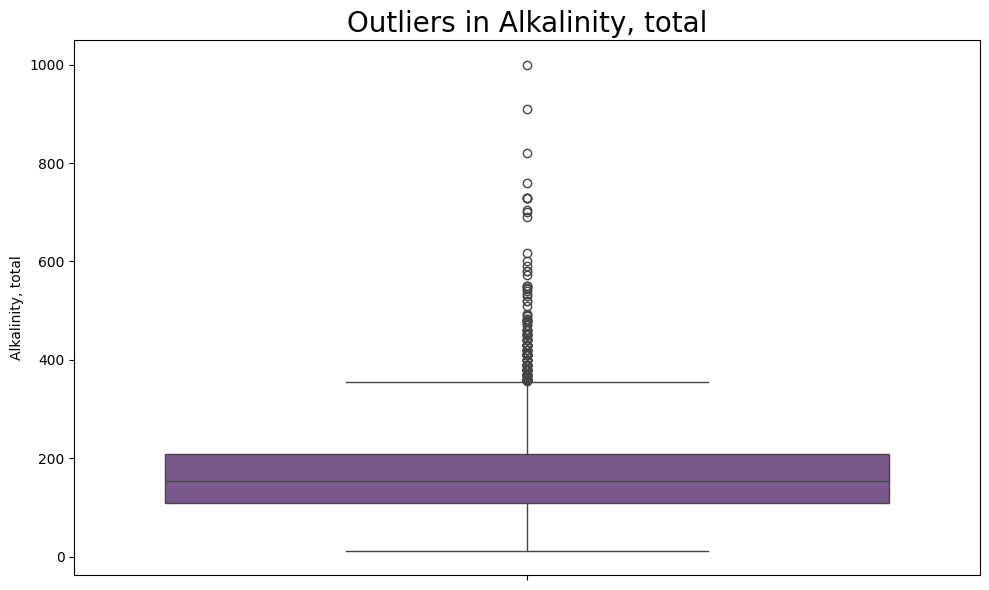

In [ ]:
show_outliers()

Untuk menentukan apakah ada sumber air yang memiliki tingkat kebasaan (Alkalinity) yang dapat dianggap outlier, kita perlu memahami kriteria outlier dari boxplot yang telah ditampilkan. Outlier adalah data yang berada di luar rentang [Q1−1.5IQR,Q3+1.5IQR], dimana Q1 adalah kuartil pertama, Q3 adalah kuartil ketiga, dan IQR adalah interkuartil range (Q3−Q1).

Dari boxplot yang telah ditampilkan, kita dapat mengidentifikasi beberapa poin penting:

1.   Median: Garis di dalam kotak.
2.   Kotak: Rentang interkuartil (IQR) antara Q1 dan Q3.
3.   Garis whiskers: Rentang data yang bukan outlier yang berada pada [Q1−1.5IQR,Q3+1.5IQR].
4.   Titik-titik di luar garis whiskers: Data yang dianggap outlier.

Dari boxplot yang ditampilkan, terdapat banyak titik di atas garis whisker atas, yang menunjukkan bahwa ada beberapa sumber air yang memiliki tingkat kebasaan (Alkalinity) yang sangat tinggi dan dapat dianggap sebagai outlier. Secara spesifik:


*   Nilai tingkat kebasaan yang lebih tinggi dari sekitar 400 (yang terlihat dari ujung garis whisker atas) dianggap outlier.
*   Ada beberapa nilai yang berada jauh di atas angka ini, mencapai hingga sekitar 1000.

Jadi, berdasarkan boxplot tersebut, diperoleh bahwa memang ada beberapa sumber air yang memiliki tingkat kebasaan yang sangat tinggi dan dapat dianggap sebagai outlier.

### 4. Apakah ada hubungan antara Specific Conductivity dan Hardness? Jelaskan!

In [ ]:
# Cek koefisien korelasi antara Specific Conductivity dengan Hardness
correlation = df['Specific Conductivity'].corr(df['Hardness'])
correlation

0.6352710459414745

Didapat nilai korelasi antara Specific Conductivity dan Hardness sebesar 0.63.

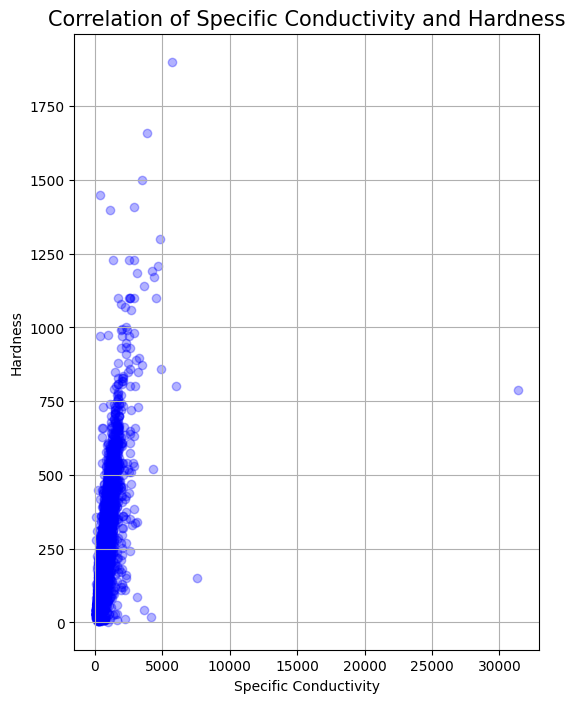

In [ ]:
# Plot grafiknya
plt.figure(figsize=(6,8))
plt.scatter(df['Specific Conductivity'],df['Hardness'],color= 'blue',alpha=0.3)
plt.title('Correlation of Specific Conductivity and Hardness')
plt.xlabel('Specific Conductivity')
plt.ylabel('Hardness')
plt.grid(True)
plt.show()

Berdasarkan scatter plot yang ditampilkan dan nilai koefisien korelasi yang telah dihitung, kita dapat menyimpulkan bahwa ada hubungan yang cukup kuat antara Specific Conductivity dan Hardness dalam sampel air yang dianalisis.

Koefisien korelasi Pearson adalah ukuran statistik yang digunakan untuk menggambarkan kekuatan dan arah hubungan linear antara dua variabel. Nilainya berkisar dari -1 hingga +1, dimana:

*   +1 menunjukkan korelasi positif sempurna
*   0 menunjukkan tidak ada korelasi
*   -1 menunjukkan korelasi negatif sempurna

Dalam kasus ini, nilai koefisien korelasi antara Specific Conductivity dan Hardness adalah 0.63. Ini berarti bahwa ada hubungan positif yang cukup kuat antara kedua variabel ini. Dengan kata lain, ketika Specific Conductivity meningkat, tingkat kesadahan (Hardness) dari air tanah juga cenderung meningkat.

### 5. Dari zat-zat kimia yang diberikan, zat-zat apa saja yang paling mempengaruhi dan paling tidak mempengaruhi Hardness? Jelaskan!

In [ ]:
# Membuat heatmap korelasi
fig = px.imshow(round(df.corr(),3),text_auto = True, width = 900,height = 600,
                labels={'color':'Correlation'},
                title = 'Correlation Heatmap')
fig.show()

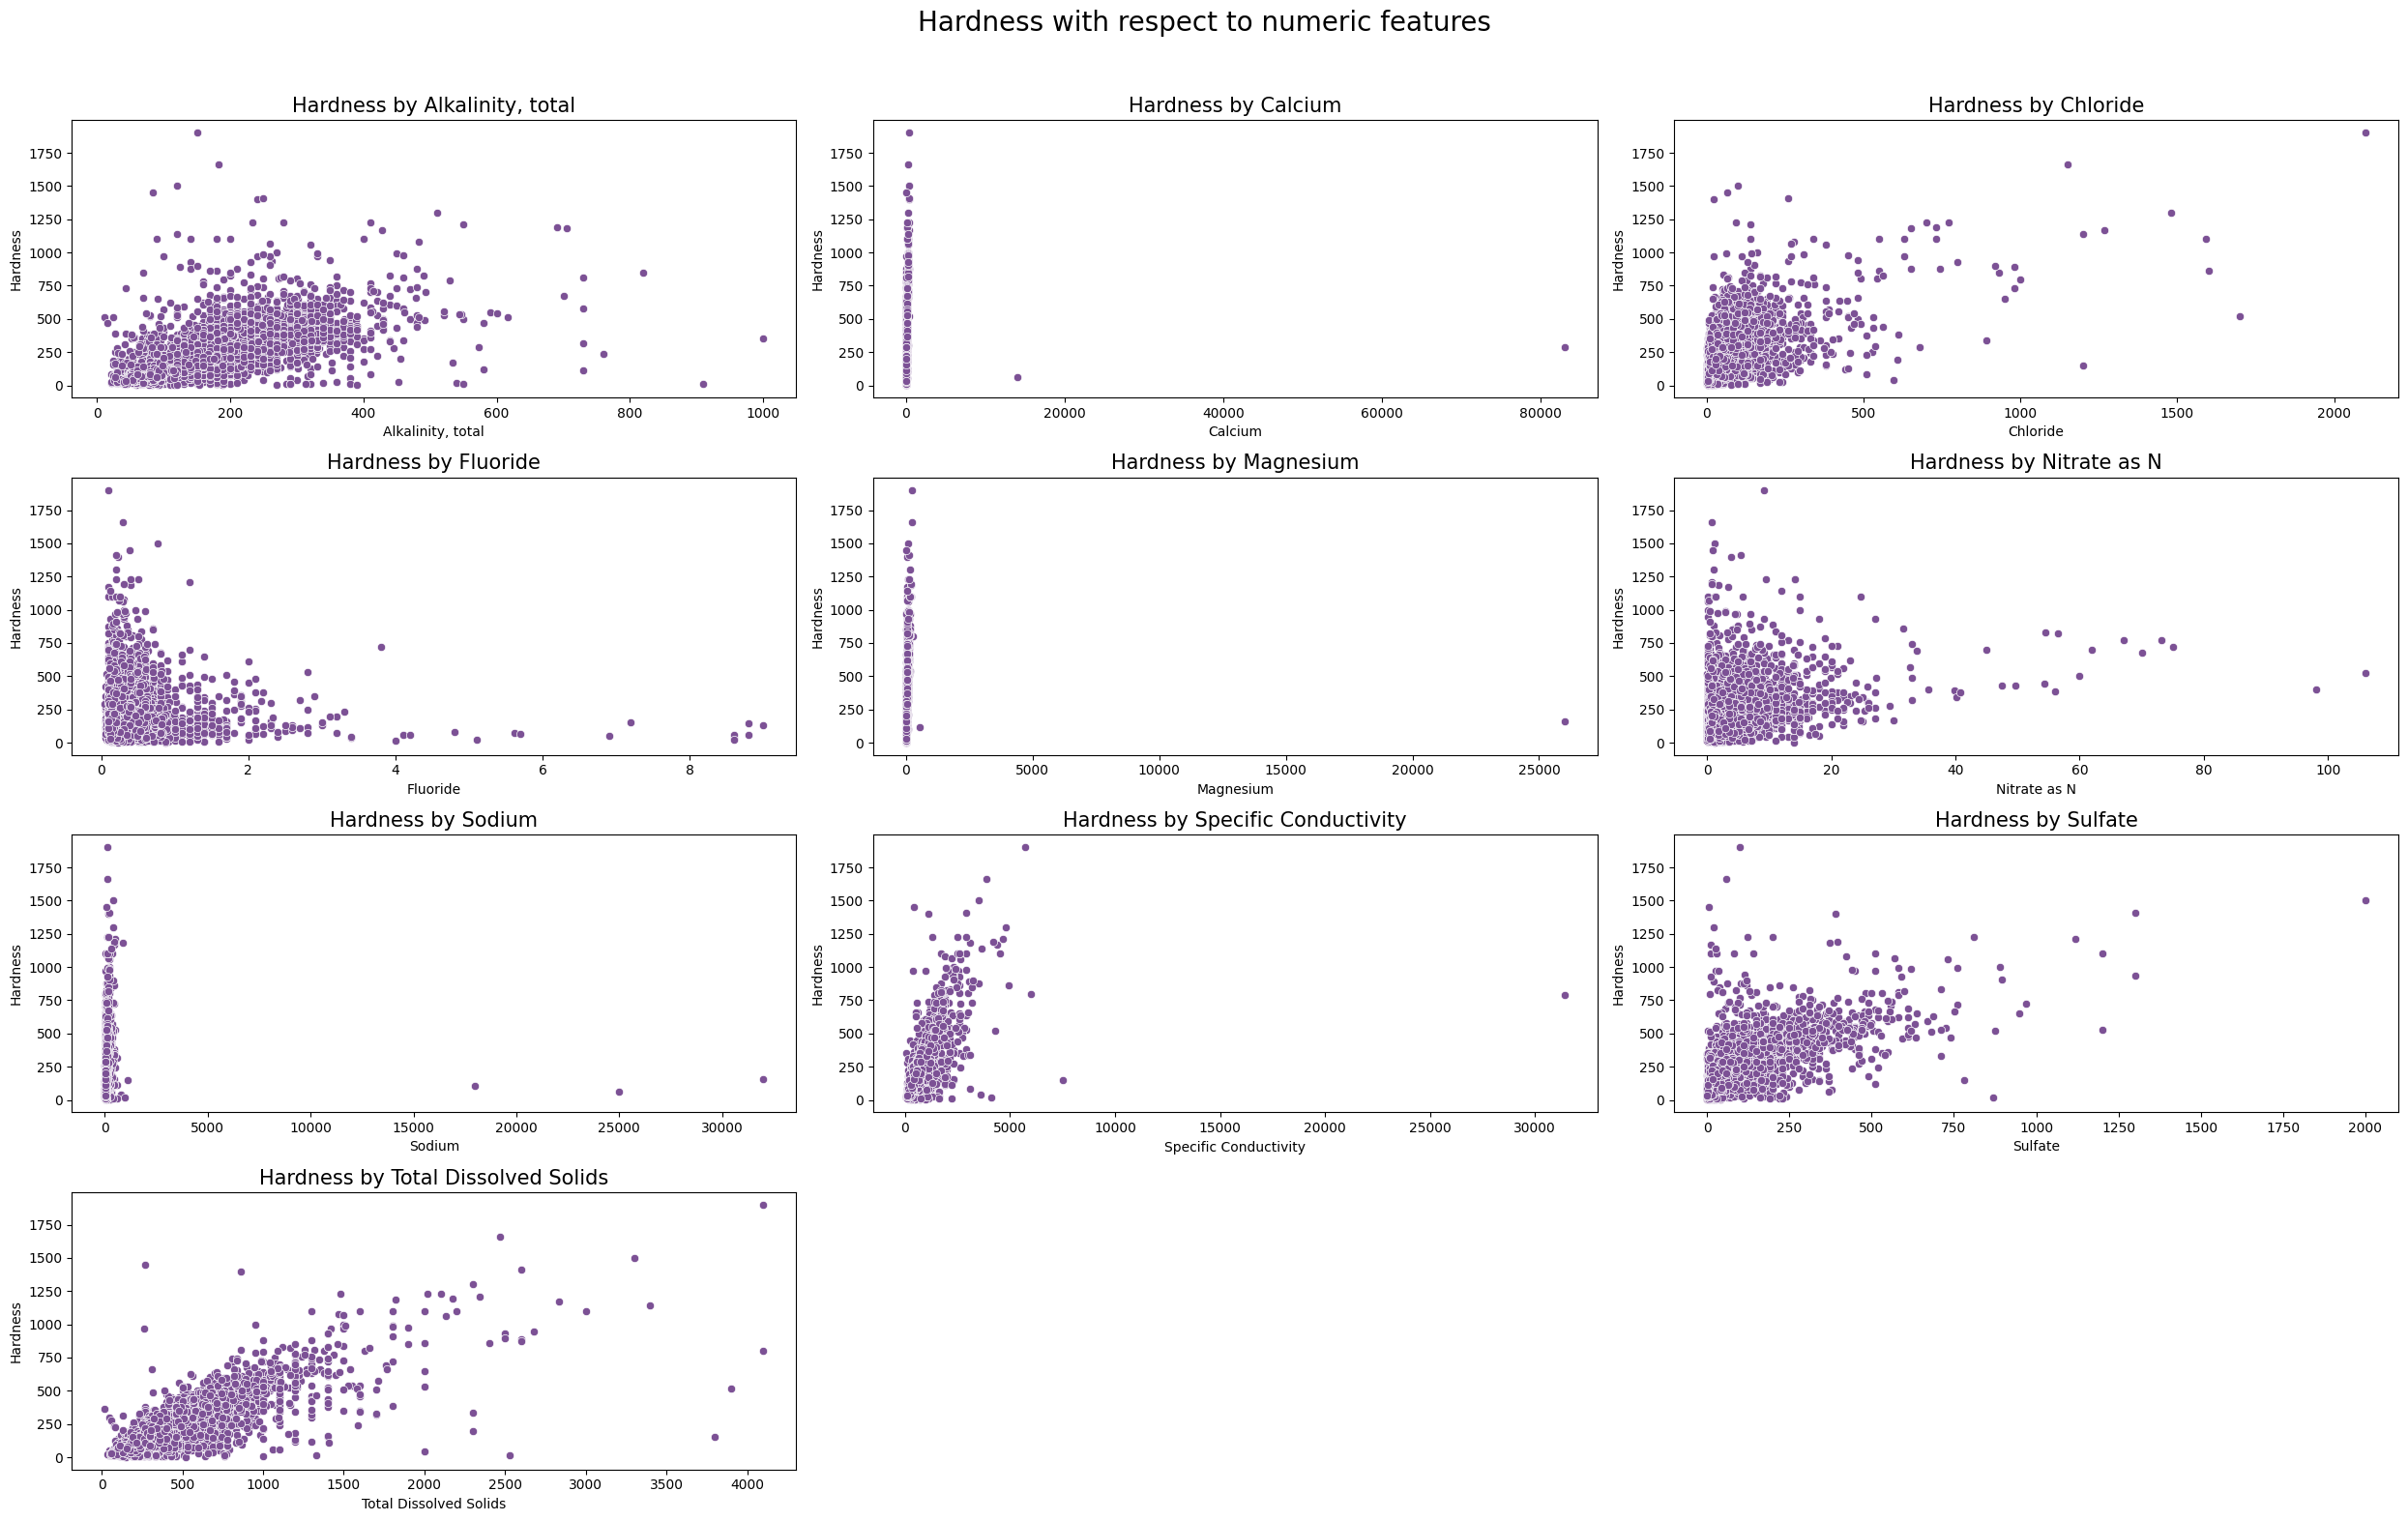

In [ ]:
# Plot grafik untuk tiap fitur
features = ['Alkalinity, total', 'Calcium', 'Chloride', 'Fluoride', 'Magnesium',
            'Nitrate as N', 'Sodium', 'Specific Conductivity', 'Sulfate', 'Total Dissolved Solids']

# Sesuaikan jumlah baris dan kolom untuk subplot
num_features = len(features)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

# Inisiasi subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=[25, 4*num_rows])
fig.suptitle('Hardness with respect to numeric features', fontsize=20)
plt.rcParams['axes.titlesize'] = 15

# Plot tiap feature
axes = axes.flatten()
for idx, col in enumerate(features):
    sns.scatterplot(data=df, x=col, y='Hardness', color='#7C5195', ax=axes[idx])
    axes[idx].set_title(f'Hardness by {col}')

# Hilangkan subplot kosong (jika ada)
for idx in range(num_features, len(axes)):
    fig.delaxes(axes[idx])

# Sesuaikan layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Berdasarkan *heatmap* serta plot grafik hubungan tiap *feature* terhadap Hardness, dapat disimpulkan ada lima *feature* yang paling memengaruhi Hardness, hal ini ditandai dengan koefisien korelasi antara *feature* ini dengan Hardness lebih dari 0.5. *Feature* tersebut diantaranya adalah Alkalinity, Chloride, Specific Conductivity, Sulfate, dan Total Disolved Solids, sedangkan *feature* yang sedikit memengaruhi Hardness adalah Nitrate as N. *Feature* selain yang disebutkan sebelumnya tidak memengaruhi Hardness karena koefisien korelasinya mendekati 0.

### 6. Apakah ada pasangan zat kimia yang berkorelasi tinggi? Apakah ada efek dari korelasi tersebut?


Merujuk pada informasi pada soal nomor 5, ada zat yang berkolerasi tinggi (yaitu yang memiliki koefisien korelasi > 0.5), sehingga jika salah satu zat mengalami peningkatan kadar pada suatu sumber air tertentu, zat yang berkorelasi tinggi (mendekati 1) dengan zat tersebut juga akan ikut meningkat kadarnya, begitu juga sebaliknya. Pasangan zat yang berkolerasi tinggi diantaranya yaitu:


1.   **Alkalinity, total - Total Dissolved Solids**: Korelasi sebesar 0.521 menunjukkan hubungan positif yang sedang. Ini berarti bahwa ketika total alkalinitas meningkat, total padatan terlarut cenderung meningkat juga, meskipun tidak terlalu kuat.
2.   **Chloride - Specific Conductivity**: Korelasi sebesar 0.602 menunjukkan hubungan positif yang cukup kuat. Ini berarti bahwa ketika kadar klorida meningkat, konduktivitas spesifik juga cenderung meningkat.
3. **Chloride - Total Dissolved Solids**: Korelasi sebesar 0.764 menunjukkan hubungan positif yang kuat. Ini berarti bahwa peningkatan kadar klorida sangat terkait dengan peningkatan total padatan terlarut.
4. **Magnesium - Sodium**: Korelasi sebesar 0.717 menunjukkan hubungan positif yang kuat. Ini berarti bahwa kadar magnesium yang lebih tinggi cenderung diikuti oleh kadar natrium yang lebih tinggi.
5. **Specific Conductivity - Sulfate**: Korelasi sebesar 0.532 menunjukkan hubungan positif yang sedang. Ini berarti bahwa peningkatan konduktivitas spesifik diikuti oleh peningkatan kadar sulfat, meskipun tidak terlalu kuat.
6. **Specific Conductivity - Total Dissolved Solids**: Korelasi sebesar 0.736 menunjukkan hubungan positif yang kuat. Ini berarti bahwa ketika konduktivitas spesifik meningkat, total padatan terlarut juga cenderung meningkat.
7. **Sulfate - Total Dissolved Solids**: Korelasi sebesar 0.728 menunjukkan hubungan positif yang kuat. Ini berarti bahwa peningkatan kadar sulfat sangat terkait dengan peningkatan total padatan terlarut.


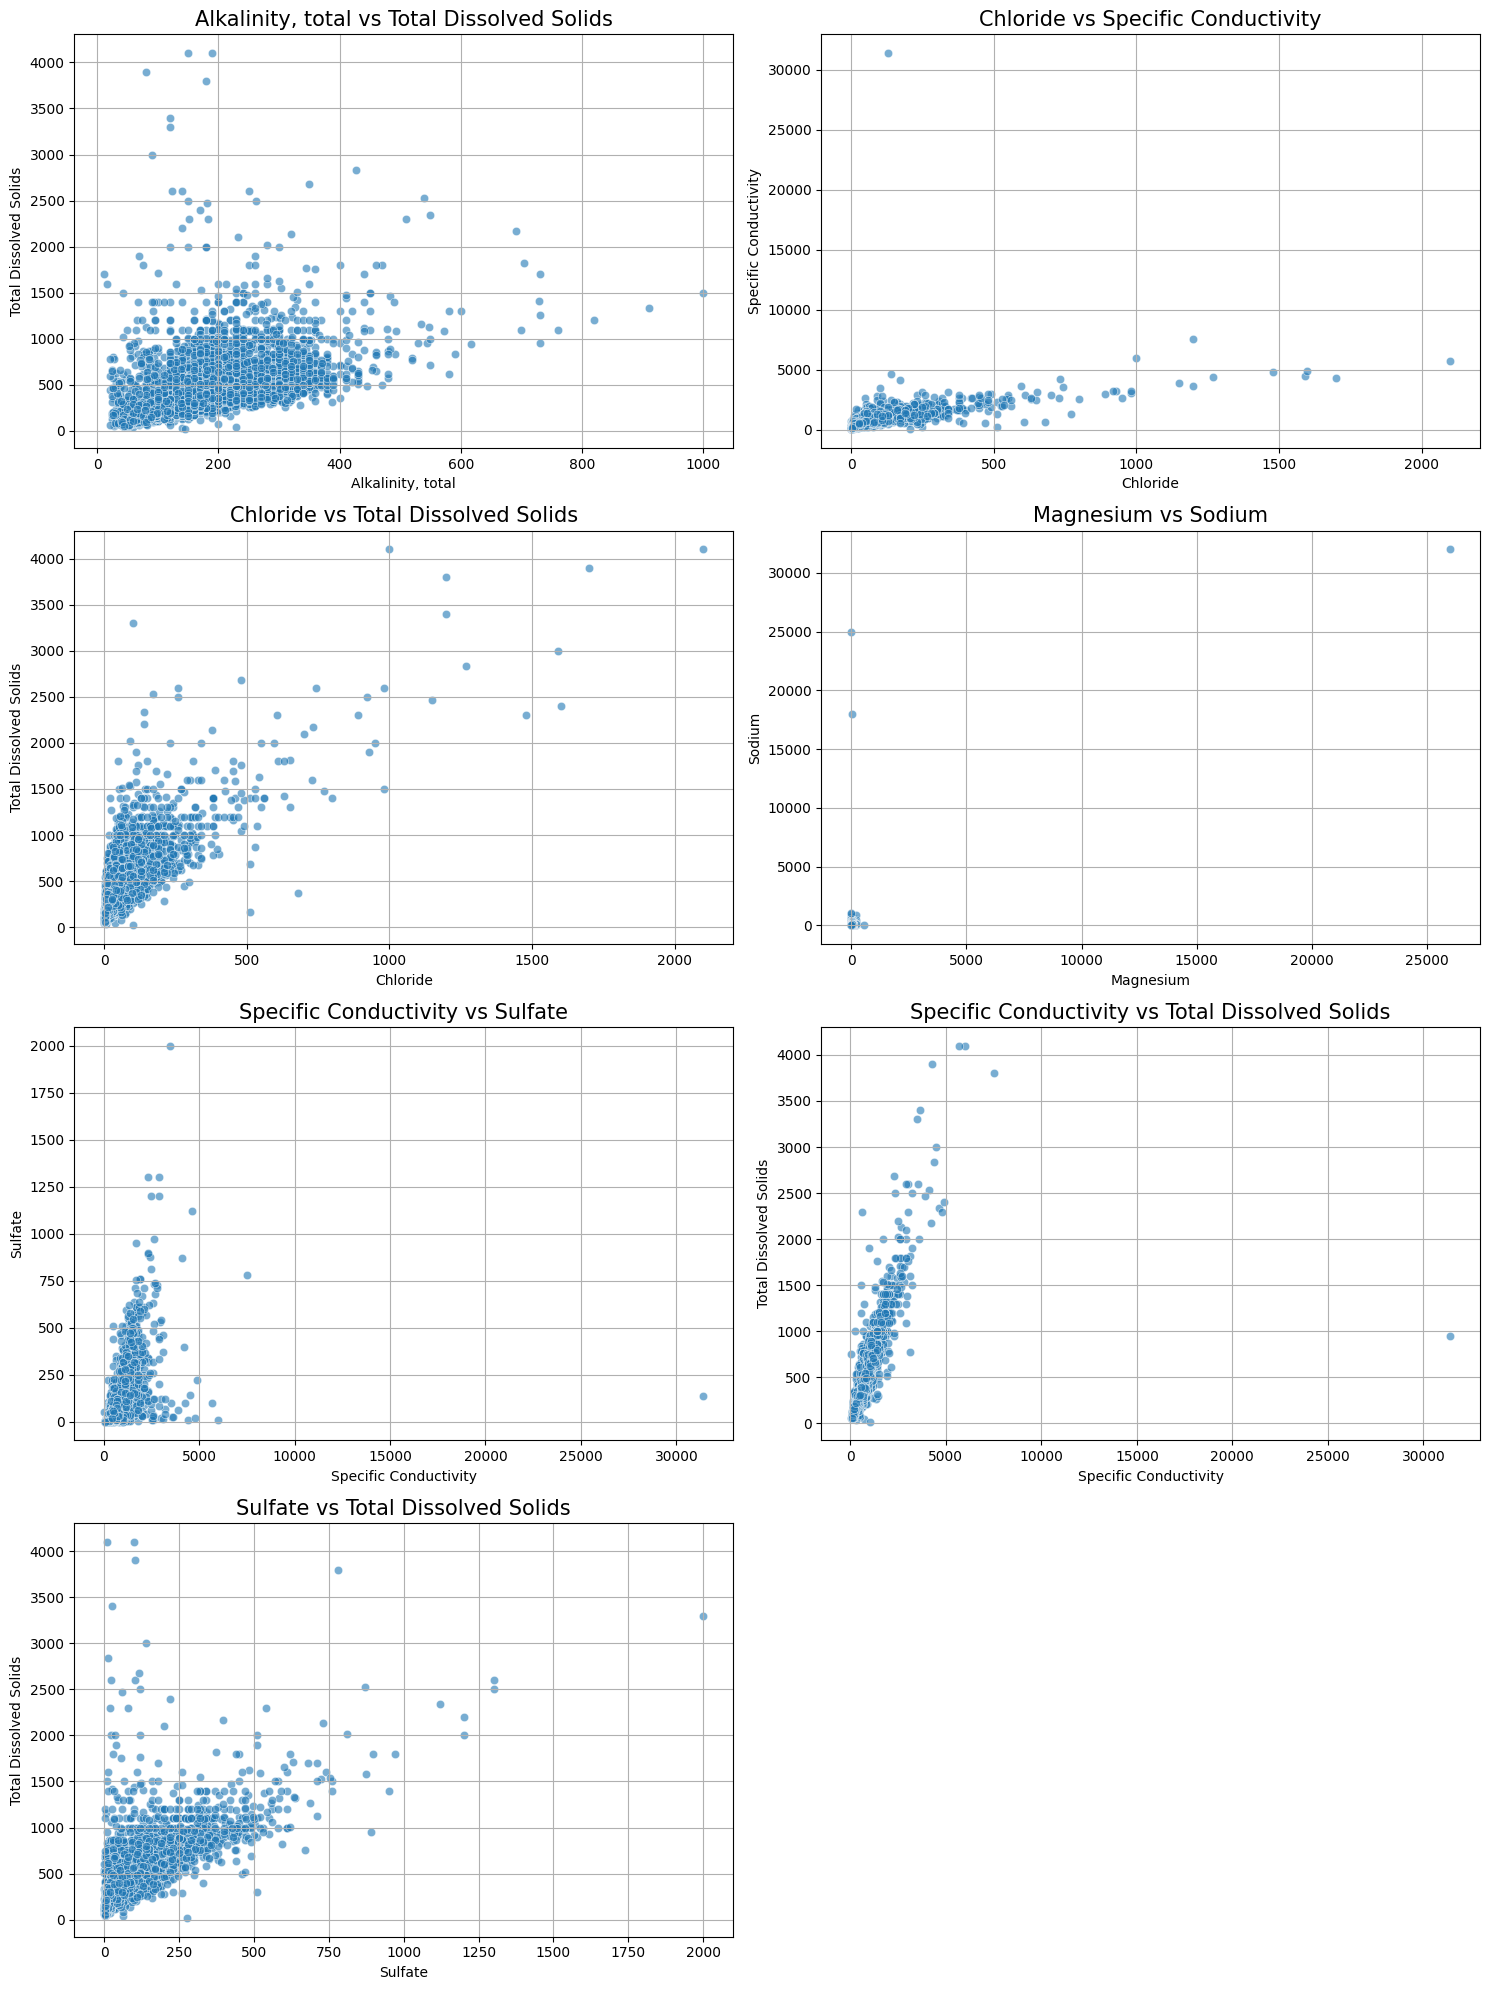

In [ ]:
# Pasangan zat yang memiliki koefisien korelasi > 0.5
pairs = [
    ('Alkalinity, total', 'Total Dissolved Solids'),
    ('Chloride', 'Specific Conductivity'),
    ('Chloride', 'Total Dissolved Solids'),
    ('Magnesium', 'Sodium'),
    ('Specific Conductivity', 'Sulfate'),
    ('Specific Conductivity', 'Total Dissolved Solids'),
    ('Sulfate', 'Total Dissolved Solids')
]

# Plot scatter untuk setiap pasangan
plt.figure(figsize=(15, 20))
for i, (x, y) in enumerate(pairs):
    plt.subplot(len(pairs)//2 + len(pairs)%2, 2, i+1)
    sns.scatterplot(x=df[x], y=df[y], alpha=0.6)
    plt.title(f'{x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
plt.tight_layout()
plt.show()

### 7. Jelaskan fitur baru apa saja yang anda peroleh untuk membantu kemampuan model dalam memprediksi ketika anda melalui proses feature engineering.

Feature engineering adalah proses di mana kita menciptakan fitur baru atau mengubah fitur yang ada untuk meningkatkan kemampuan model dalam memprediksi target. Berikut adalah beberapa fitur baru yang kami peroleh melalui proses feature engineering dan penjelasan mengapa fitur-fitur tersebut dapat membantu meningkatkan performa model:

1. Calcium_Magnesium: Interaksi antara kalsium dan magnesium.
    
  Alasan: Kalsium dan magnesium adalah mineral yang sering berasosiasi dengan kekerasan air. Interaksi antara kedua unsur ini dapat memberikan informasi tambahan tentang tingkat kekerasan air.

2. Magnesium_Chloride: Interaksi antara magnesium dan klorida.
    
  Alasan: Magnesium dan klorida adalah ion yang berperan dalam kekerasan dan kandungan kimia air. Kombinasi keduanya dapat membantu model memahami hubungan antara konsentrasi ion ini dan kekerasan air.

3. Calcium_Sulfate: Interaksi antara kalsium dan sulfat.
    
  Alasan: Sulfat adalah anion umum yang dapat berinteraksi dengan kalsium. Kombinasi ini dapat memberikan gambaran yang lebih baik tentang kandungan mineral dalam air dan hubungannya dengan kekerasan air.

4. Calcium_Fluoride: Penjumlahan antara kalsium dan fluorida.
  
  Alasan: Fluorida adalah anion lain yang dapat berinteraksi dengan kalsium. Penambahan konsentrasi kedua unsur ini dapat memberikan wawasan tambahan tentang komposisi kimia air.

5. Chloride_Sulfate_Nitrate: Penjumlahan antara klorida, sulfat, dan nitrat.
  
  Alasan: Kombinasi dari beberapa anion utama dalam air dapat memberikan model pandangan yang lebih komprehensif tentang kandungan anorganik dalam air, yang pada gilirannya dapat membantu dalam memprediksi kekerasan air.


### 8. Jelaskan model yang Anda gunakan dalam memprediksi label Hardness! Mengapa Anda menggunakan model tersebut?


Dari beberapa model regresi yang telah kami uji coba, meliputi linear regression, decision tree regressor, random tree regressor, stacking regressor, dan voting regressor. Kami memilih model ensemble dengan teknik meta-stacking dengan data yang telah ditangani outliernya dan tambahan fitur baru yang kami buat berdasarkan EDA.

#### EDA (Exploration Data Analysis)

EDA adalah langkah awal untuk memahami struktur, distribusi, dan karakteristik dataset. Berikut langkah-langkah EDA yang dilakukan:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6400 non-null   int64  
 1   Alkalinity, total       6400 non-null   float64
 2   Calcium                 6400 non-null   float64
 3   Chloride                6400 non-null   float64
 4   Fluoride                6400 non-null   float64
 5   Magnesium               6400 non-null   float64
 6   Nitrate as N            6400 non-null   float64
 7   Sodium                  6400 non-null   float64
 8   Specific Conductivity   6400 non-null   float64
 9   Sulfate                 6400 non-null   float64
 10  Total Dissolved Solids  6400 non-null   float64
 11  Hardness                6400 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 600.1 KB
None
                id  Alkalinity, total       Calcium     Chloride     Fluoride  \
count  6400.

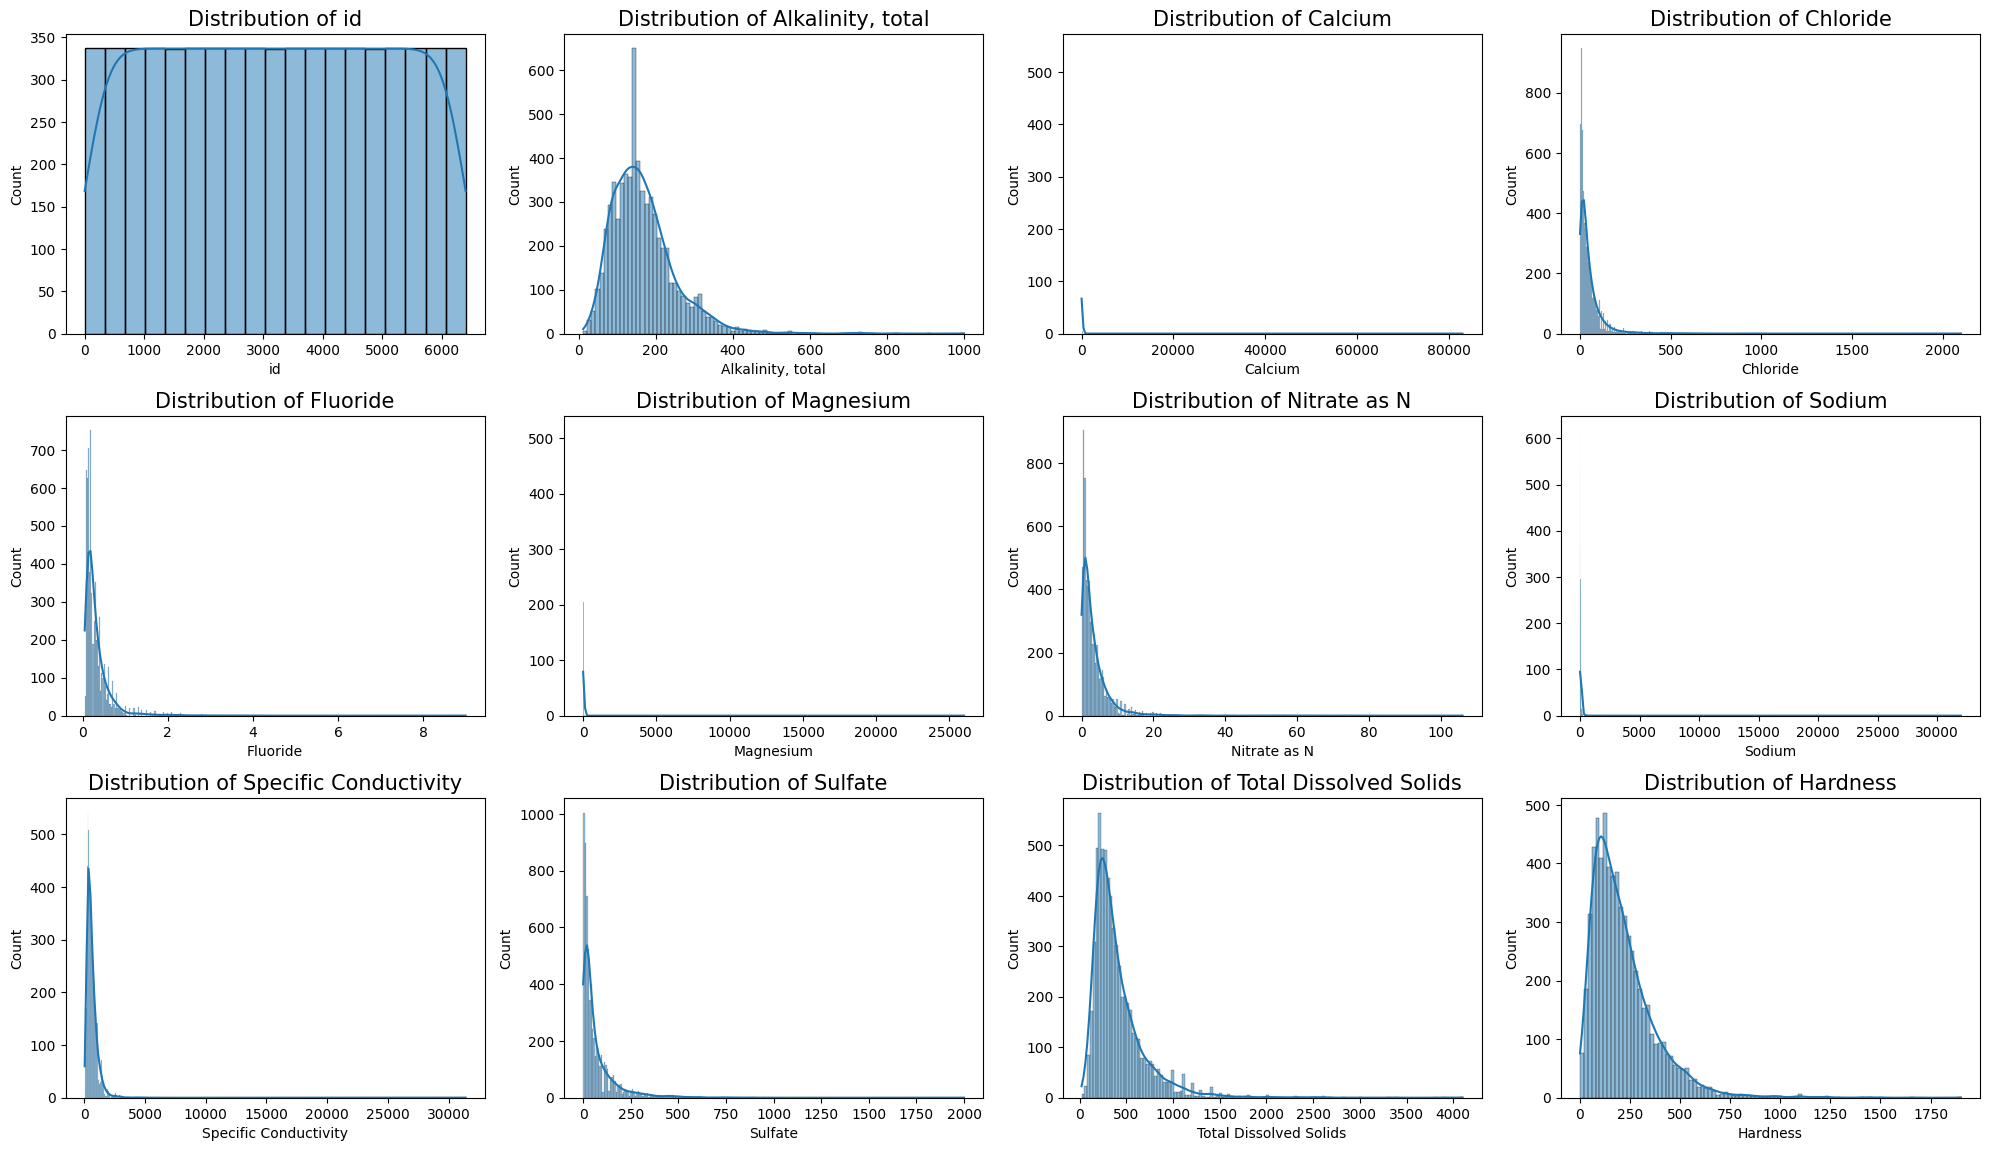

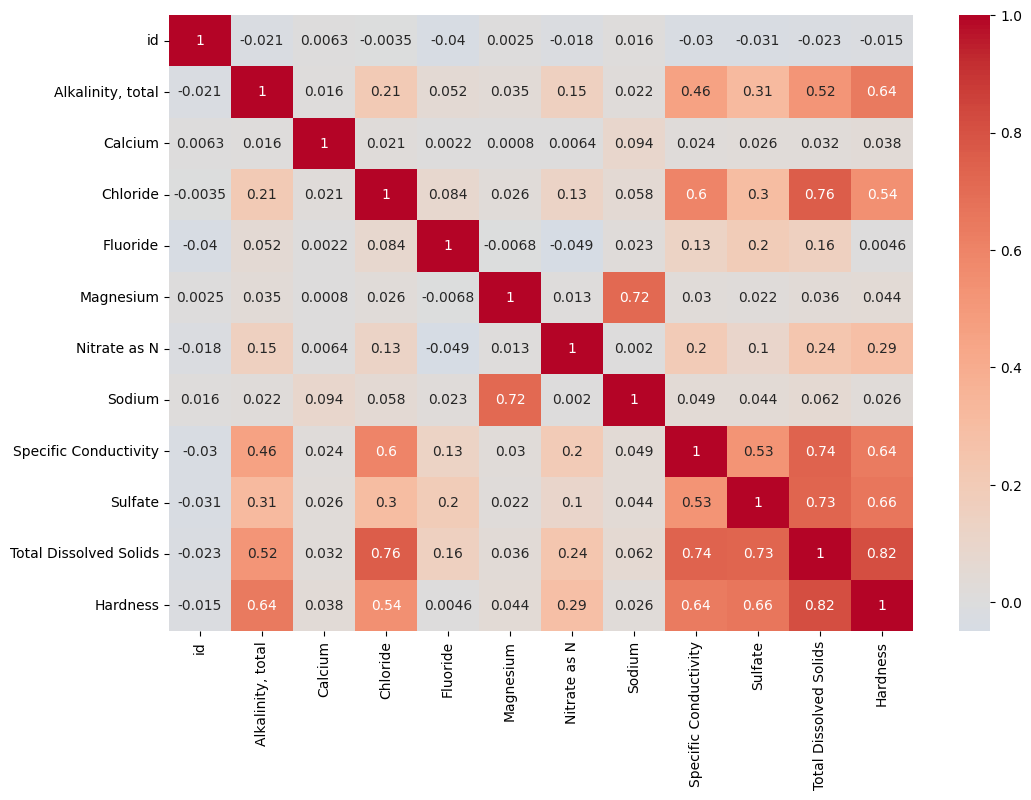

In [ ]:
# Load the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Display basic information
print(train_df.info())
print(train_df.describe())

# Visualize the distributions of the features
plt.figure(figsize=(20, 15))
for i, column in enumerate(train_df.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(train_df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.show()

#### Data Preprocessing


1. Handling Outliers

  Menangani outlier dengan mengganti nilai yang melebihi ambang batas tertentu dengan NaN. Hal ini penting untuk mengurangi pengaruh negatif dari outlier pada model. Setelah diubah ke NaN, kami mengisinya dengan kNNImputer.



In [ ]:
def handle_outliers(df, column, threshold):
    df[column] = np.where(df[column] > threshold, np.nan, df[column])

outlier_thresholds = {
    'Calcium': 10000,
    'Magnesium': 400,
    'Sodium': 15000,
    'Specific Conductivity': 10000,
    'Sulfate': 1500,
}

for col, threshold in outlier_thresholds.items():
    handle_outliers(train_df, col, threshold)
    handle_outliers(test_df, col, threshold)


from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
train_features = pd.DataFrame(imputer.fit_transform(train_df.drop(columns=['Hardness', 'id'])),
                              columns=train_df.drop(columns=['Hardness', 'id']).columns)
test_features = pd.DataFrame(imputer.transform(test_df.drop(columns=['id'])),
                             columns=test_df.drop(columns=['id']).columns)


2. Feature Engineering

  Untuk memperjelas relationship dari fitur dan label kami menambahkan beberapa fitur baru sesuai dengan mutual informasi yang didapatkan dan keterhubungannya di dunia nyata.
  Menambahkan fitur baru berdasarkan kombinasi dan interaksi antara variabel-variabel penting untuk membantu model memahami hubungan yang lebih kompleks.

In [ ]:
train_features['Calcium_Magnesium'] = train_features['Magnesium'] * train_features['Calcium']
train_features['Magnesium_Sulfate'] = train_features['Magnesium'] * train_features['Sulfate']
train_features['Calcium_Sulfate'] = train_features['Calcium'] * train_features['Sulfate']
train_features['Calcium_Fluoride'] = train_features['Calcium'] + train_features['Fluoride']
train_features['Chloride_Sulfate_Nitrate'] = train_features['Chloride'] + train_features['Sulfate'] + train_features['Nitrate as N']

test_features['Calcium_Magnesium'] = test_features['Magnesium'] * test_features['Calcium']
test_features['Magnesium_Sulfate'] = test_features['Magnesium'] * test_features['Sulfate']
test_features['Calcium_Sulfate'] = test_features['Calcium'] * test_features['Sulfate']
test_features['Calcium_Fluoride'] = test_features['Calcium'] + test_features['Fluoride']
test_features['Chloride_Sulfate_Nitrate'] = test_features['Chloride'] + test_features['Sulfate'] + test_features['Nitrate as N']


3. Standarisasi fitur

  Standarisasi fitur menggunakan RobustScaler untuk mengatasi pengaruh outliers.

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(train_features)
X_test_scaled = scaler.transform(test_features)


#### Select, Train, Tune, dan Evaluate model


Setelah kami lakukan perhitungan skor pada data yang telah kami proses, kami mendapati bahwa Random forest dan Gradient Boosting baik untuk model kami karena menghasilkan root mean squared error (RMSE) yang kecil dan R2 yang besar.

Membagi data dengan *rules of thumb*

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, train_df['Hardness'], test_size=0.2, random_state=42)


Karena Random forest dan Gradient boosting bekerja dengan baik dalam data yang telah kami proses, kami mencoba menggunakan teknik meta stacking, yaitu menggunakan 2 lapisan regresi, Gradient Boosting dan Random forest, sebagai model dasar dan ridge sebagai model akhir.

Meta stacking adalah teknik *ensemble* yang menggabungkan beberapa model dasar (base models) untuk meningkatkan akurasi prediksi dengan memanfaatkan kekuatan dari setiap model. Dalam meta stacking, model dasar seperti Random Forest dan Gradient Boosting pertama-tama dilatih pada data pelatihan dan kemudian menghasilkan prediksi yang digunakan sebagai fitur baru untuk model meta. Model meta, seperti Ridge Regression, kemudian dilatih menggunakan prediksi dari model dasar sebagai input untuk menghasilkan prediksi akhir. Teknik ini mengurangi variabilitas dan risiko *overfitting*, serta meningkatkan performa model dengan mengoptimalkan kombinasi prediksi dari berbagai model.

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge

base_models = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('gb', GradientBoostingRegressor(random_state=42))
]

meta_model = Ridge()

stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model, n_jobs=-1)


Selanjutnya, kami menggunakan RandomizedSearchCV untuk menemukan hyperparameter terbaik bagi model stacking.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,KFold

param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [3, 4, 5],
    'gb__n_estimators': [100, 200, 300],
    'gb__learning_rate': [0.01, 0.05, 0.1],
    'gb__max_depth': [3, 4, 5]
}

random_search = RandomizedSearchCV(estimator=stacking_regressor, param_distributions=param_grid, n_iter=50,
                                   cv=KFold(5, shuffle=True, random_state=42), scoring='neg_mean_squared_error',
                                   n_jobs=-1, verbose=2, random_state=42)


Selanjutnya, model akan dilatih dan dievaluasi.

In [ ]:
best_model = random_search.fit(X_train, y_train).best_estimator_

y_val_pred = best_model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

print(f'Validation RMSE: {val_rmse}')
print(f'Validation R^2: {val_r2}')


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Validation RMSE: 50.804677938829705
Validation R^2: 0.9060868313480952


#### Membuat submisi

In [ ]:
test_predictions = best_model.predict(X_test_scaled)

submission = pd.DataFrame({
    'id': test_df['id'],
    'Hardness': test_predictions
})

submission.to_csv('submission_model.csv', index=False)
print("Submission file created.")


Submission file created.


#### Insight yang didapat

Setelah outliers ditangani, persebaran data pada tiap feature menjadi tidak terlalu jauh sehingga model akan lebih mudah mempelajari data nantinya. Selain itu, beberapa *feature* mengalami kenaikan koefisien korelasi dengan Hardness.

### 9. Menurut Anda, apakah metrik penilaian R2 tepat? Jika tidak, metrik penilaian apa yang menurut anda lebih tepat digunakan? Elaborasikan jawaban Anda!

*Multiple linear regression* adalah metode statistik yang digunakan untuk memodelkan hubungan antara satu variabel dependen dengan dua atau lebih variabel independen. Permasalahan pada dataset kali ini merupakan salah satu bentuk *multiple linear regression*. Dalam evaluasi model regresi linear, R² sering digunakan sebagai salah satu metrik penilaian. R² adalah suatu metrik penilaian yang tidak bergantung dari seberapa besar ukuran dari suatu dataset atau skalanya. R² dihitung dengan rumus:


> **R² = 1- SSR/SST**

dengan SSR (sum of squared residuals) adalah jumlah kuadrat dari selisih antara nilai asli dengan nilai yang diprediksi dan SST (sum of squared total) adalah jumlah kuadrat dari selisih antara nilai asli dengan rata-rata nilai asli.

Dengan kata lain, R² mengukur seberapa besar penurunan dalam jumlah kuadrat residuals (kesalahan) yang dicapai dengan menggunakan model kita dibandingkan dengan hanya menggunakan rata-rata dari variabel dependen sebagai prediksi.

Menurut kami, penggunaan R² sebenarnya sudah cukup untuk persoalan kali ini karena R² memberikan gambaran tentang seberapa baik model dalam menjelaskan variasi data. Namun, akan lebih baik jika dikombinasikan menggunakan MSE karena MSE bisa memberikan informasi tentang seberapa besar kesalahan prediksi rata-rata yang dihasilkan oleh model dalam satuan yang sama dengan variabel dependen. Dengan demikian, *insight* yang didapat juga lebih banyak.


### 10. Jika Anda boleh mengambil data dari sumber eksternal, data tentang apa yang Anda akan ambil? Jelaskan mengapa data tersebut dapat membantu Anda memprediksi Hardness

Untuk memprediksi kesadahan (hardness) air tanah, mengambil data eksternal yang relevan dapat meningkatkan akurasi model prediktif. Berikut adalah beberapa jenis data eksternal yang akan kami ambil:

1. Data Meteorologi

  Data tentang curah hujan, suhu, kelembapan, dan pola cuaca di Meksiko dapat mempengaruhi tingkat kesadahan air tanah. Misalnya, hujan asam dapat meningkatkan kandungan mineral dalam air tanah melalui pelarutan batuan.

2. Data Geologi

  Informasi tentang jenis batuan dan tanah di Meksiko serta distribusi mineral di lapisan tanah mempengaruhi konsentrasi kalsium dan magnesium dalam air tanah. Daerah dengan batuan kapur cenderung memiliki air tanah dengan kesadahan tinggi.

3. Data Sumber Polusi
  
  Data tentang lokasi dan jenis sumber polusi, seperti pabrik, pertanian, dan pembuangan limbah di Meksiko juga diperlukan karena identifikasi sumber polusi dapat membantu memahami kontaminan yang berkontribusi terhadap kesadahan air dan memungkinkan penargetan intervensi yang lebih tepat.

4. Data Pemeriksaan Kualitas Air Historis

  Riwayat data kualitas air di Meksiko selama beberapa tahun mungkin memiliki pola tertentu. Pola historis ini dapat membantu dalam memahami tren dan perubahan dalam kesadahan air tanah dari waktu ke waktu.


# Kesimpulan
Dari dataset yang diberikan, dapat disimpulkan bahwa ada beberapa zat yang memiliki pengaruh besar terhadap tingkat kesadahan air tanah (hardness) di Meksiko, seperti Alkalinity, Chloride, Specific Conductivity, Sulfate, dan Total Disolved Solids.

Untuk menghasilkan prediksi tingkat kesadahan air yang akurat, diperlukan penanganan *outlier* yang tepat, penanganan *outlier* akan memudahkan model dalam mempelajari dataset nantinya. Pada kasus kali ini, *outlier* ditangani dengan menjadikan nilai yang melewati batas atas dengan NaN. Kemudian, nilai tersebut diimputasi berdasarkan 5 tetangga terdekat.

Selain itu, perlu dilakukan *feature engineering* untuk membantu model mempelajari dataset nantinya, seperti menambahkan fitur baru dengan *feature interaction* dan menstandardisasi fitur. Setelah *feature engineering* dilakukan, akan dibuat model dengan menggunakan model ensemble dengan teknik meta-stacking. Terakhir, akan dilakukan evaluasi terhadap model yang telah dibuat.

# Daftar Pustaka

Géron, Aurélien. Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow. O’Reilly Media, 2019.

Gelman, A., Hill, J., & Vehtari, A. Regression and Other Stories. Cambridge University Press, 2023.

Burkov, Andriy. The Hundred-Page Machine Learning Book. Situs web https://ema.cri-info.cm/wp-content/uploads/2019/07/2019BurkovTheHundred-pageMachineLearning.pdf, 2019.

Starmer, Josh. The StatQuest Guide to Machine Learning!!!. Situs web www.statquest.org, 2022.

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-35b04a1a-7325-3552-b9a3-5efdec6a14ed)
